# Other Models: Latent Semantic Analysis, Brown Clustering

In [1]:
import pandas as pd
import numpy as np
import re 
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from helpers.preprocessing import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghanharrington/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = load("data/impresso3.csv")

In [7]:
df.head()

,uid,type,language,title,size,country,newspaper,issue,pages,nb_pages,...,year,is_on_front,date,persons_mentioned,locations_mentioned,content,access_right,content_provider,is_content_available,"[total:7120,available:7200]"
0,JDG-1964-04-29-a-i0007,NaN,fr,"Un jour en Suisse"" sera insuffisant pour décou...",1185,CH,JDG,JDG-1964-04-29-a,2,1,...,1964,False,1964-04-29 00:00:00+00:00,"Les Sécuritas|M. Gabriel Despland, président|M...",Suisse|Lausanne|Suisse|Lausanne|Suisse|Lausanne,"Un jour en Suisse "" sera insuffisant pour déco...",OpenPrivate,SNL,y,NaN
1,GDL-1964-10-16-a-i0035,NaN,fr,Après une campagne de protestation 500 000 vis...,601,CH,GDL,GDL-1964-10-16-a,3,1,...,1964,False,1964-10-16 00:00:00+00:00,"M. Charles Apothéloz, directeur|M. Hans Giger|...",Suisse|Suisse|Lausanne|Lausanne|Bern|Suisse,Après une campagne de protestation 500 000 vis...,OpenPrivate,SNL,y,NaN
2,luxland-1968-04-26-a-i0033,NaN,fr,L'ordinateur n'est un épouvantail que pour les...,430,LU,luxland,luxland-1968-04-26-a,6,1,...,1968,False,1968-04-26 00:00:00+00:00,"Irving Adler, spécialiste américain",NaN,NaN,Closed,BNL,NaN,NaN
3,EXP-1970-04-20-a-i0053,NaN,fr,"Â Bâle, la formation professionnelle horlogère",342,CH,EXP,EXP-1970-04-20-a,3,1,...,1970,False,1970-04-20 00:00:00+00:00,NaN,Bâle|Bâle,"Â Bâle, la formation professionnelle horlogère...",OpenPrivate,SNL,y,NaN
4,IMP-1970-04-21-a-i0174,NaN,fr,NaN,324,CH,IMP,IMP-1970-04-21-a,14,1,...,1970,False,1970-04-21 00:00:00+00:00,NaN,Bâle,Stand «Formation professionnelle horlogère » à...,OpenPrivate,SNL,y,NaN


In [8]:
df = cleanup(df)

/Users/meghanharrington/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df.shape

(4352, 21)

### Preprocessing

In [10]:
data = spacy_prep(df.content)

In [11]:
# Remove words that appear in more than 30% of the articles and words that appear less than 3 times
min_words = 3
max_freq = 0.3

In [12]:
# create_corpus creates a spacy dictionary and corpus 
dictionary, corpus = create_corpus(data, min_words, max_freq)

### LSA

In [13]:
from helpers.models import *

In [14]:
num_words = 10

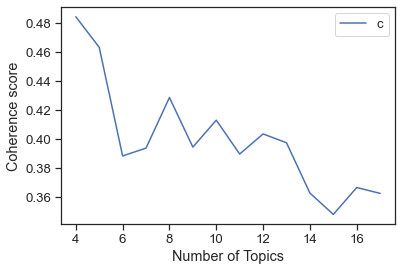

In [15]:
# Plot coherences by number of topics
start = 4
stop = 18
step = 1
power_iters = 10
plot_graph(data, dictionary, corpus, start, stop, step, power_iters)

In [17]:
# Compute coherences for multiple different topic numbers
models, coherences = compute_coherences_lsa(dictionary, corpus, data, 4, 13, 1, 10)

In [18]:
coherences

[0.46065160418858986,
 0.4374795826141241,
 0.3886058170996424,
 0.3925027916890516,
 0.4135159786050643,
 0.39995097766696797,
 0.41731627271638416,
 0.4184591999035247,
 0.3831787569347875]

In [19]:
# We see the highest coherence for 5 topics, so let's see what we get
lsa_model = lsa(dictionary, corpus, 4, num_words, 10)

[(0, '0.206*"console" + 0.176*"nintendo" + 0.144*"enfant" + 0.141*"jeune" + 0.141*"film" + 0.118*"pouvoir" + 0.113*"ecran" + 0.113*"voir" + 0.110*"annee" + 0.106*"titre"'), (1, '0.362*"nintendo" + 0.350*"console" + -0.246*"enfant" + -0.224*"jeune" + 0.180*"mario" + 0.176*"super" + -0.164*"film" + 0.151*"playstation" + 0.123*"titre" + 0.114*"cartouche"'), (2, '-0.323*"film" + 0.319*"nintendo" + 0.196*"enfant" + 0.155*"console" + 0.152*"million" + 0.146*"marche" + -0.142*"course" + 0.137*"mario" + 0.136*"super" + -0.134*"mode"'), (3, '0.496*"film" + 0.405*"mario" + 0.286*"super" + 0.228*"nintendo" + -0.215*"playstation" + 0.173*"super_mario" + 0.135*"cinema" + -0.129*"course" + -0.128*"sony" + -0.123*"console"')]


In [21]:
models[0].print_topics(num_words=15)

[(0,
  '0.206*"console" + 0.176*"nintendo" + 0.144*"enfant" + 0.141*"jeune" + 0.141*"film" + 0.118*"pouvoir" + 0.113*"ecran" + 0.113*"voir" + 0.110*"annee" + 0.106*"titre" + 0.105*"ete" + 0.104*"suisse" + 0.104*"playstation" + 0.099*"jour" + 0.097*"prendre"'),
 (1,
  '0.362*"nintendo" + 0.350*"console" + -0.246*"enfant" + -0.224*"jeune" + 0.180*"mario" + 0.176*"super" + -0.164*"film" + 0.151*"playstation" + 0.123*"titre" + 0.114*"cartouche" + 0.105*"sony" + -0.097*"suisse" + -0.096*"violence" + 0.089*"version" + -0.088*"parent"'),
 (2,
  '-0.323*"film" + 0.319*"nintendo" + 0.196*"enfant" + 0.155*"console" + 0.152*"million" + 0.146*"marche" + -0.142*"course" + 0.137*"mario" + 0.136*"super" + -0.134*"mode" + -0.122*"personnage" + -0.119*"playstation" + 0.113*"franc" + -0.111*"combat" + -0.105*"action"'),
 (3,
  '-0.496*"film" + -0.405*"mario" + -0.286*"super" + -0.228*"nintendo" + 0.215*"playstation" + -0.173*"super_mario" + -0.135*"cinema" + 0.129*"course" + 0.128*"sony" + 0.123*"consol

We get some topics but they all seem pretty similar and not very interesting. There is a lot of repetition of words among the different topics. For example, the first two topics both have nintendo and console as their most important words. This is to be expected, since LSA is known to perform poorly on a small corpus.

### Brown Clustering

The implementation for this method comes from Percy Liang's C implementation.

https://github.com/percyliang/brown-cluster

To get the paths file, I just followed the README and gave it our articles (already preprocessed) as input.
It is a hierarchical clustering method.

In [82]:
df_brown = pd.read_csv("models/paths", sep="\t", header=None)
df_brown.columns = ["topic", "word", "freq"]
df_brown

,topic,word,freq
0,0,ack,1
1,0,univac,1
2,0,maricllc,1
3,0,budziszewsker,1
4,0,hilt,1
...,...,...,...
61491,11111,vouloir,1198
61492,11111,venir,1211
61493,11111,ete,1858
61494,11111,falloir,2429


In [80]:
# Look at the top words for each topic
top_words = pd.DataFrame()
for top in df_brown.topic.unique():
    top_words = top_words.append(df_brown[df_brown.topic == top].sort_values(by = 'freq', ascending = False).head(10))
top_words

,topic,word,freq
9803,0,jeu_video,4876
9802,0,jean,764
9801,0,the,723
9800,0,of,671
9799,0,etat_uni,607
...,...,...,...
61490,11111,devoir,1158
61489,11111,permettre,1128
61488,11111,question,874
61487,11111,homme,816


In [81]:
# Top words for each topic
top_words['words'] = top_words.topic.apply(lambda x: ' '.join(top_words[top_words.topic == x].word))
top_words = top_words.drop(['word', 'freq'], axis=1).drop_duplicates()
top_words

,topic,words
9803,0,jeu_video jean the of etat_uni saint chaux_fon...
11964,1000,nintendo playstation mario boy live laurent ke...
13465,10010,machine sony game version photo sega portable ...
14331,10011,super metal master possesseur for need offert ...
16789,1010,tissier la lissier geneve fribourg france laus...
18631,1011,de pascal cedric wolfgang sur herbert pour mar...
26593,1100,grand joueur petit monde annee suisse ecran fo...
29265,110100,propose aventure action offrir premiere fin co...
33315,110101,console mode meilleur genre salle manette vent...
34012,110110,video role electroniqu tir videos olympiques p...


This is interesting because the top words are pretty different than the other methods. The clusters represent words of a similar type, so cluster 11110 and 11111 are filled with verbs, cluster 1011 looks like names, cluster 1010 has locations. The results are interesting, but maybe not adapted to our problem.